In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import statsmodels.api as st
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [2]:
#Lifelines is a survival analysis package
from lifelines import KaplanMeierFitter
from lifelines.statistics import multivariate_logrank_test   
from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter

In [3]:
telcoData = pd.read_csv("Data/Telco_Customer_Churn.csv")
telcoData.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telcoData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
telcoData['Churn'] = labelencoder.fit_transform(telcoData['Churn'])
telcoData['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [6]:
eventVar = telcoData['Churn']
timeVar = telcoData['tenure']

In [7]:
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
               'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

survivalData = pd.get_dummies(telcoData, columns = categorical, drop_first= True)
survivalData.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,34,56.95,1889.5,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,45,42.30,1840.75,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,2,70.70,151.65,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [8]:
survivalData.drop(['customerID', 'tenure', 'Churn'], axis = 1, inplace= True)
survivalData = st.add_constant(survivalData, prepend=False)
survivalData.head()

,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,const
0,29.85,29.85,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1.0
1,56.95,1889.5,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,1.0
2,53.85,108.15,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1.0
3,42.30,1840.75,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1.0
4,70.70,151.65,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,1.0


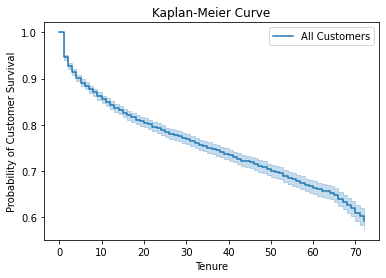

In [9]:
#Create a KaplanMeier object, imported from lifelines
kmf = KaplanMeierFitter()
#Calculate the K-M curve for all groups
kmf.fit(timeVar, event_observed = eventVar, label = "All Customers")
#Plot the curve and assign labels
kmf.plot()
plt.ylabel('Probability of Customer Survival')
plt.xlabel('Tenure')
plt.title('Kaplan-Meier Curve');

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.53 0.47      1.09

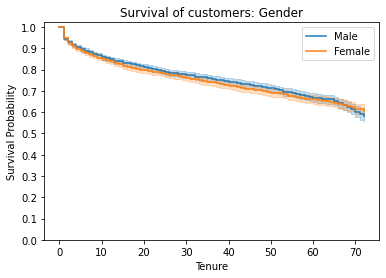

In [10]:
male = (survivalData['gender_Male'] == 1)
female = (survivalData['gender_Male'] == 0)

plt.figure()
ax = plt.subplot(1, 1, 1)

kmf.fit(timeVar[male], event_observed = eventVar[male], label = "Male")
plot1 = kmf.plot(ax = ax)

kmf.fit(timeVar[female], event_observed = eventVar[female], label = "Female")
plot2 = kmf.plot(ax = plot1)
                 
plt.title('Survival of customers: Gender')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
groups = logrank_test(timeVar[male], timeVar[female], event_observed_A=eventVar[male], event_observed_B=eventVar[female])
groups.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         423.54 <0.005    310.21

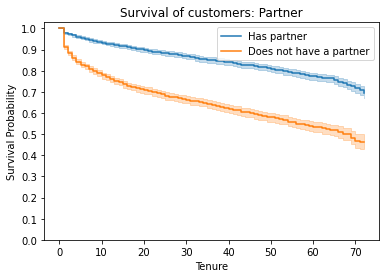

In [11]:
partner = (survivalData['Partner_Yes'] == 1)
no_partner = (survivalData['Partner_Yes'] == 0)

plt.figure()
ax = plt.subplot(1, 1, 1)

kmf.fit(timeVar[partner], event_observed = eventVar[partner], label = "Has partner")
plot1 = kmf.plot(ax = ax)

kmf.fit(timeVar[no_partner], event_observed = eventVar[no_partner], label = "Does not have a partner")
plot2 = kmf.plot(ax = plot1)
                 
plt.title('Survival of customers: Partner')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
groups = logrank_test(timeVar[partner], timeVar[no_partner], event_observed_A=eventVar[partner], event_observed_B=eventVar[no_partner])
groups.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.43 0.51      0.97

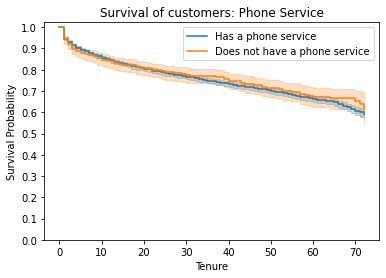

In [12]:
PhoneService = (survivalData['PhoneService_Yes'] == 1)
no_PhoneService = (survivalData['PhoneService_Yes'] == 0)

plt.figure()
ax = plt.subplot(1, 1, 1)

kmf.fit(timeVar[PhoneService], event_observed = eventVar[PhoneService], label = "Has a phone service")
plot1 = kmf.plot(ax = ax)

kmf.fit(timeVar[no_PhoneService], event_observed = eventVar[no_PhoneService], label = "Does not have a phone service")
plot2 = kmf.plot(ax = plot1)
                 
plt.title('Survival of customers: Phone Service')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
groups = logrank_test(timeVar[PhoneService], timeVar[no_PhoneService], event_observed_A=eventVar[PhoneService], event_observed_B=eventVar[no_PhoneService])
groups.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
          30.97 <0.005     22.34

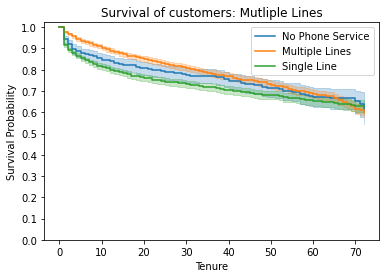

In [13]:
no_phone = (survivalData['MultipleLines_No phone service'] == 1)
multiLines = (survivalData['MultipleLines_Yes'] == 1)
no_multiLines = ((survivalData['MultipleLines_Yes'] == 0) & (survivalData['MultipleLines_No phone service'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timeVar[no_phone], event_observed = eventVar[no_phone], label = "No Phone Service")
plot1 = kmf.plot(ax = ax)

kmf.fit(timeVar[multiLines], event_observed = eventVar[multiLines], label = "Multiple Lines")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timeVar[no_multiLines], event_observed = eventVar[no_multiLines], label = "Single Line")
plot3 = kmf.plot(ax = plot2)
                 
plt.title('Survival of customers: Mutliple Lines')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(telcoData['tenure'], telcoData['MultipleLines'], telcoData['Churn'],
                                                  alpha = 0.95)
twoplusgroups_logrank.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         520.12 <0.005    375.19

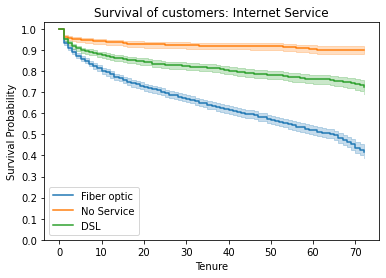

In [14]:
Fiber_optic = (survivalData['InternetService_Fiber optic'] == 1)
No_Service = (survivalData['InternetService_No'] == 1)
DSL = ((survivalData['InternetService_Fiber optic'] == 0) & (survivalData['InternetService_No'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timeVar[Fiber_optic], event_observed = eventVar[Fiber_optic], label = "Fiber optic")
plot1 = kmf.plot(ax = ax)

kmf.fit(timeVar[No_Service], event_observed = eventVar[No_Service], label = "No Service")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timeVar[DSL], event_observed = eventVar[DSL], label = "DSL")
plot3 = kmf.plot(ax = plot2)
                 
plt.title('Survival of customers: Internet Service')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(telcoData['tenure'], telcoData['InternetService'], telcoData['Churn'], 
                                                  alpha = 0.95)
twoplusgroups_logrank.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
        1013.86 <0.005    731.35

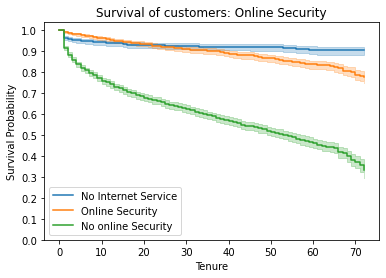

In [15]:
no_internetService = (survivalData['OnlineSecurity_No internet service'] == 1)
onlineSecurity = (survivalData['OnlineSecurity_Yes'] == 1)
no_onlineSecurity = ((survivalData['OnlineSecurity_No internet service'] == 0) & (survivalData['OnlineSecurity_Yes'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timeVar[no_internetService], event_observed = eventVar[no_internetService], label = "No Internet Service")
plot1 = kmf.plot(ax = ax)

kmf.fit(timeVar[onlineSecurity], event_observed = eventVar[onlineSecurity], label = "Online Security")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timeVar[no_onlineSecurity], event_observed = eventVar[no_onlineSecurity], label = "No online Security")
plot3 = kmf.plot(ax = plot2)
                 
plt.title('Survival of customers: Online Security')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(telcoData['tenure'], telcoData['OnlineSecurity'], telcoData['Churn'], 
                                                  alpha = 0.95)
twoplusgroups_logrank.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         763.51 <0.005    550.75

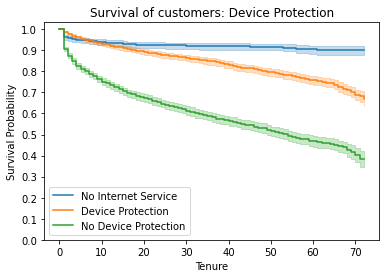

In [16]:
no_internetService = (survivalData['DeviceProtection_No internet service'] == 1)
DeviceProtection = (survivalData['DeviceProtection_Yes'] == 1)
no_DeviceProtection = ((survivalData['DeviceProtection_No internet service'] == 0) & (survivalData['DeviceProtection_Yes'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timeVar[no_internetService], event_observed = eventVar[no_internetService], label = "No Internet Service")
plot1 = kmf.plot(ax = ax)

kmf.fit(timeVar[DeviceProtection], event_observed = eventVar[DeviceProtection], label = "Device Protection")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timeVar[no_DeviceProtection], event_observed = eventVar[no_DeviceProtection], label = "No Device Protection")
plot3 = kmf.plot(ax = plot2)
                 
plt.title('Survival of customers: Device Protection')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(telcoData['tenure'], telcoData['DeviceProtection'], telcoData['Churn'], 
                                                  alpha = 0.95)
twoplusgroups_logrank.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         989.56 <0.005    713.82

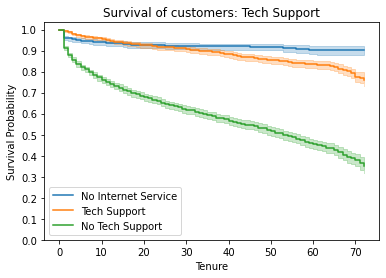

In [17]:
no_internetService = (survivalData['TechSupport_No internet service'] == 1)
TechSupport = (survivalData['TechSupport_Yes'] == 1)
no_TechSupport = ((survivalData['TechSupport_No internet service'] == 0) & (survivalData['TechSupport_Yes'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timeVar[no_internetService],event_observed = eventVar[no_internetService],label = "No Internet Service")
plot1 = kmf.plot(ax = ax)

kmf.fit(timeVar[TechSupport],event_observed = eventVar[TechSupport],label = "Tech Support")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timeVar[no_TechSupport],event_observed = eventVar[no_TechSupport],label = "No Tech Support")
plot3 = kmf.plot(ax = plot2)
                 
plt.title('Survival of customers: Tech Support')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(telcoData['tenure'], telcoData['TechSupport'], telcoData['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         368.31 <0.005    265.68

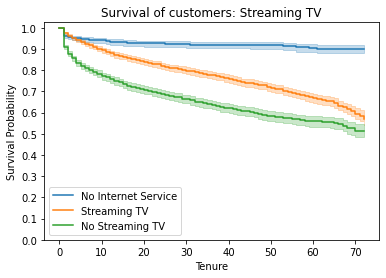

In [18]:
no_internetService = (survivalData['StreamingTV_No internet service'] == 1)
StreamingTV = (survivalData['StreamingTV_Yes'] == 1)
no_StreamingTV = ((survivalData['StreamingTV_No internet service'] == 0) & (survivalData['StreamingTV_Yes'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timeVar[no_internetService],event_observed = eventVar[no_internetService],label = "No Internet Service")
plot1 = kmf.plot(ax = ax)

kmf.fit(timeVar[StreamingTV],event_observed = eventVar[StreamingTV],label = "Streaming TV")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timeVar[no_StreamingTV],event_observed = eventVar[no_StreamingTV],label = "No Streaming TV")
plot3 = kmf.plot(ax = plot2)
                 
plt.title('Survival of customers: Streaming TV')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(telcoData['tenure'], telcoData['StreamingTV'], telcoData['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         378.43 <0.005    272.98

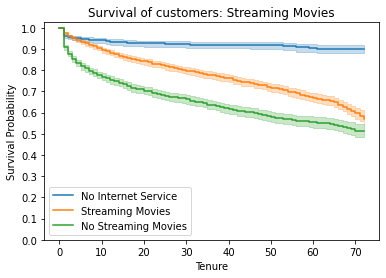

In [19]:
no_internetService = (survivalData['StreamingMovies_No internet service'] == 1)
StreamingMovies = (survivalData['StreamingMovies_Yes'] == 1)
no_StreamingMovies = ((survivalData['StreamingMovies_No internet service'] == 0) & (survivalData['StreamingMovies_Yes'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timeVar[no_internetService],event_observed = eventVar[no_internetService],label = "No Internet Service")
plot1 = kmf.plot(ax = ax)

kmf.fit(timeVar[StreamingMovies],event_observed = eventVar[StreamingMovies],label = "Streaming Movies")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timeVar[no_StreamingMovies],event_observed = eventVar[no_StreamingMovies],label = "No Streaming Movies")
plot3 = kmf.plot(ax = plot2)
                 
plt.title('Survival of customers: Streaming Movies')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(telcoData['tenure'], telcoData['StreamingMovies'], telcoData['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
        2352.87 <0.005       inf

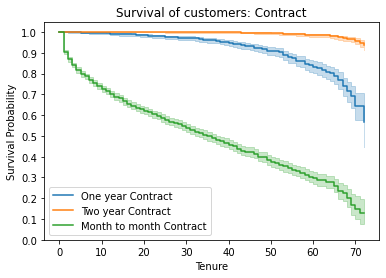

In [20]:
Contract_One_year = (survivalData['Contract_One year'] == 1)
Contract_Two_year = (survivalData['Contract_Two year'] == 1)
Contract_month_to_month = ((survivalData['Contract_One year'] == 0) & (survivalData['Contract_Two year'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timeVar[Contract_One_year],event_observed = eventVar[Contract_One_year],label = "One year Contract")
plot1 = kmf.plot(ax = ax)

kmf.fit(timeVar[Contract_Two_year],event_observed = eventVar[Contract_Two_year],label = "Two year Contract")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timeVar[Contract_month_to_month],event_observed = eventVar[Contract_month_to_month],label = "Month to month Contract")
plot3 = kmf.plot(ax = plot2)
                 
plt.title('Survival of customers: Contract')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(telcoData['tenure'], telcoData['Contract'], telcoData['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 3
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         865.24 <0.005    619.58

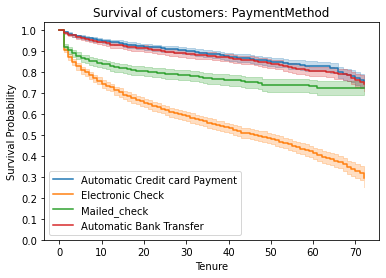

In [21]:
automatic_Credit_Card = (survivalData['PaymentMethod_Credit card (automatic)'] == 1)
electronic_check = (survivalData['PaymentMethod_Electronic check'] == 1)
mailed_check = (survivalData['PaymentMethod_Mailed check'] == 1)
automatic_Bank_Transfer = ((survivalData['PaymentMethod_Credit card (automatic)'] == 0) & (survivalData['PaymentMethod_Electronic check'] == 0) & (survivalData['PaymentMethod_Mailed check'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timeVar[automatic_Credit_Card],event_observed = eventVar[automatic_Credit_Card],label = "Automatic Credit card Payment")
plot1 = kmf.plot(ax = ax)

kmf.fit(timeVar[electronic_check],event_observed = eventVar[electronic_check],label = "Electronic Check")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timeVar[mailed_check],event_observed = eventVar[mailed_check],label = "Mailed_check")
plot3 = kmf.plot(ax = plot2)

kmf.fit(timeVar[automatic_Bank_Transfer],event_observed = eventVar[automatic_Bank_Transfer],label = "Automatic Bank Transfer")
plot4 = kmf.plot(ax = plot3)
                 
plt.title('Survival of customers: PaymentMethod')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(telcoData['tenure'], telcoData['PaymentMethod'], telcoData['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         189.51 <0.005    140.82

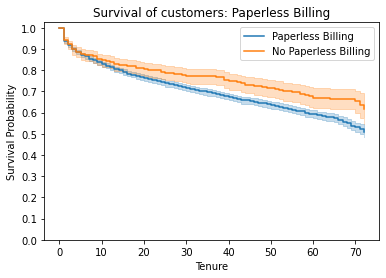

In [22]:
PaperlessBilling = (survivalData['PaperlessBilling_Yes'] == 1)
no_PaperlessBilling = (survivalData['PaperlessBilling_Yes'] == 0)

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timeVar[PaperlessBilling],event_observed = eventVar[PaperlessBilling],label = "Paperless Billing")
plot1 = kmf.plot(ax = ax)

kmf.fit(timeVar[no_PhoneService],event_observed = eventVar[no_PhoneService],label = "No Paperless Billing")
plot2 = kmf.plot(ax = plot1)
                 
plt.title('Survival of customers: Paperless Billing')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
groups = logrank_test(timeVar[PaperlessBilling], timeVar[no_PaperlessBilling], event_observed_A=eventVar[PaperlessBilling], event_observed_B=eventVar[no_PaperlessBilling])
groups.print_summary()

In [23]:
def datapreparation(filepath):
    
    df = pd.read_csv(filepath)
    df.drop(["customerID"], inplace = True, axis = 1)
    
    df.TotalCharges = df.TotalCharges.replace(" ",np.nan)
    df.TotalCharges.fillna(0, inplace = True)
    df.TotalCharges = df.TotalCharges.astype(float)
    
    cols1 = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn', 'PhoneService']
    for col in cols1:
        df[col] = df[col].apply(lambda x: 0 if x == "No" else 1)
   
    df.gender = df.gender.apply(lambda x: 0 if x == "Male" else 1)
    df.MultipleLines = df.MultipleLines.map({'No phone service': 0, 'No': 0, 'Yes': 1})
    
    cols2 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    for col in cols2:
        df[col] = df[col].map({'No internet service': 0, 'No': 0, 'Yes': 1})
    
    df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)
    
    return df

In [24]:
regression_df = datapreparation("Data/Telco_Customer_Churn.csv")
regression_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


In [25]:
cph = CoxPHFitter()
cph.fit(regression_df, duration_col='tenure', event_col='Churn')

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -12659.69
         time fit was run = 2021-08-05 16:41:37 UTC

---
                                        coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                     
gender                                  0.04       1.04       0.05            -0.05             0.13                 0.95                 1.14
SeniorCitizen                           0.03       1.04       0.06            -0.08             0.15                 0.93                 1.16
Partner                                -0.18       0.84       0.06            -0.29            -0.07                 0.75                 0.93
Dependents                             -0.09       0.91       0.07            -0.23             0.05                 0.80                 1.05
PhoneService                            0.83       2.29       0.47            -0.10             1.76                 0.90                 5.80
MultipleLines                           0.09       1.09       0.13            -0.16             0.33                 0.85                 1.40
OnlineSecurity                         -0.21       0.81       0.13            -0.47             0.05                 0.62                 1.05
OnlineBackup                           -0.06       0.95       0.13            -0.31             0.19                 0.74                 1.21
DeviceProtection                        0.09       1.09       0.13            -0.16             0.34                 0.85                 1.40
TechSupport                            -0.08       0.92       0.13            -0.34             0.17                 0.71                 1.19
StreamingTV                             0.28       1.32       0.24            -0.18             0.74                 0.83                 2.10
StreamingMovies                         0.29       1.33       0.24            -0.18             0.75                 0.84                 2.11
PaperlessBilling                        0.15       1.16       0.06             0.04             0.26                 1.04                 1.30
MonthlyCharges                          0.01       1.01       0.02            -0.03             0.06                 0.97                 1.06
TotalCharges                           -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
InternetService_Fiber optic             1.02       2.77       0.58            -0.12             2.15                 0.89                 8.59
InternetService_No                     -2.34       0.10       0.60            -3.51            -1.17                 0.03                 0.31
Contract_One year                      -1.27       0.28       0.10            -1.46            -1.07                 0.23                 0.34
Contract_Two year                      -3.70       0.02       0.20            -4.10            -3.31                 0.02                 0.04
PaymentMethod_Credit card (automatic)  -0.01       0.99       0.09            -0.19             0.17                 0.83                 1.18
PaymentMethod_Electronic check          0.39       1.47       0.07             0.24             0.53                 1.28                 1.70
PaymentMethod_Mailed check              0.51       1.67       0.09             0.34             0.68                 1.40                 1.98

                                           z      p   -log2(p)
covariate                                                     
gender                                  0.85   0.40       1.33
SeniorCitizen

In [31]:
cph.score

<bound method SemiParametricPHFitter.score of <lifelines.SemiParametricPHFitter: fitted with 7043 total observations, 5174 right-censored observations>>

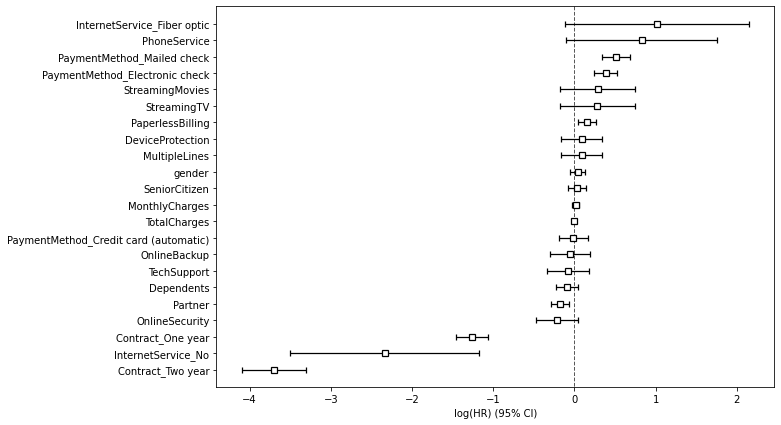

In [32]:
fig, ax = plt.subplots(figsize = (10,7))
cph.plot(ax = ax);

In [33]:
test_id = regression_df.sample(1)

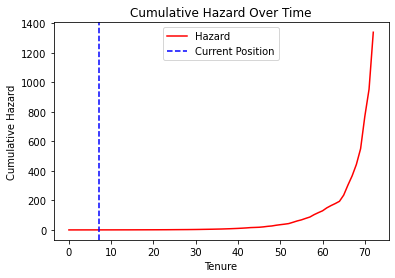

In [34]:
fig, ax = plt.subplots()
cph.predict_cumulative_hazard(test_id).plot(ax = ax, color = 'red')
plt.axvline(x=test_id.tenure.values[0], color = 'blue', linestyle='--')
plt.legend(labels=['Hazard','Current Position'])
ax.set_xlabel('Tenure', size = 10)
ax.set_ylabel('Cumulative Hazard', size = 10)
ax.set_title('Cumulative Hazard Over Time');

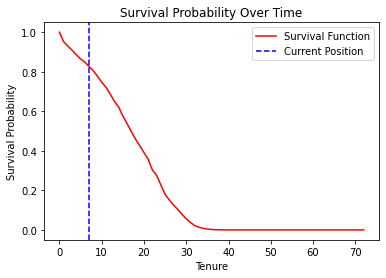

In [39]:
fig, ax = plt.subplots()
cph.predict_survival_function(test_id).plot(ax = ax, color = 'red')
plt.axvline(x=test_id.tenure.values[0], color = 'blue', linestyle='--')
plt.legend(labels=['Survival Function','Current Position'])
ax.set_xlabel('Tenure', size = 10)
ax.set_ylabel('Survival Probability', size = 10)
ax.set_title('Survival Probability Over Time');

In [40]:
import pickle
pickle.dump(cph, open('survivemodel.pkl','wb'))

In [41]:
test_id

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2437,1,0,0,0,7,1,0,1,1,1,0,0,0,0,61.4,438.9,0,0,0,0,0,0,1,0


In [47]:
def LTV(info):
    life = cph.predict_survival_function(info).reset_index()
    life.columns = ['Tenure', 'Probability']
    max_life = life.Tenure[life.Probability > 0.1].max()
    
    LTV = max_life * info['MonthlyCharges'].values[0]
    return LTV

In [48]:
print('LTV of a testid is:', LTV(test_id), 'dollars.')

LTV of a testid is: 1719.2 dollars.
